## Stock Price Prediction and Forecasting using Stacked LSTM (APPLE Co. dataset)

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr

In [15]:
df = pdr.get_data_tiingo('META', api_key= '')

In [16]:
df.to_csv('META.csv')


In [17]:
import pandas as pd
df=pd.read_csv('META.csv')

In [18]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,META,2017-12-28 00:00:00+00:00,177.92,178.94,177.68,177.95,11008996,177.92,178.94,177.68,177.95,11008996,0.0,1.0
1,META,2017-12-29 00:00:00+00:00,176.46,178.85,176.46,178.00,10028758,176.46,178.85,176.46,178.00,10028758,0.0,1.0
2,META,2018-01-02 00:00:00+00:00,181.42,181.58,177.55,177.68,17694891,181.42,181.58,177.55,177.68,17694891,0.0,1.0
3,META,2018-01-03 00:00:00+00:00,184.67,184.78,181.33,181.88,16595495,184.67,184.78,181.33,181.88,16595495,0.0,1.0
4,META,2018-01-04 00:00:00+00:00,184.33,186.21,184.10,184.90,13554357,184.33,186.21,184.10,184.90,13554357,0.0,1.0


In [19]:
df1=df.reset_index()['close']

In [20]:
df1.head()

0    177.92
1    176.46
2    181.42
3    184.67
4    184.33
Name: close, dtype: float64

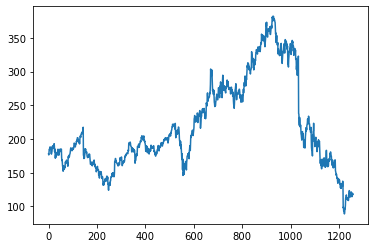

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [32]:
import numpy as np

### LSTM is sensitive to the scale of data so we apply MinMax Scaler.

In [23]:
df1

0       177.92
1       176.46
2       181.42
3       184.67
4       184.33
         ...  
1252    114.48
1253    117.09
1254    119.76
1255    117.12
1256    118.04
Name: close, Length: 1257, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler
#scaling values between 0-1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
print(df1)


[[0.30350871]
 [0.29853036]
 [0.31544311]
 ...
 [0.10519317]
 [0.09619122]
 [0.09932826]]


In [26]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size,test_size


(817, 440)

In [28]:
train_data

array([[0.30350871],
       [0.29853036],
       [0.31544311],
       [0.32652505],
       [0.3253657 ],
       [0.33395847],
       [0.33883452],
       [0.33743649],
       [0.3373342 ],
       [0.33709551],
       [0.30845296],
       [0.30511133],
       [0.30241757],
       [0.30991919],
       [0.31499983],
       [0.32891192],
       [0.34248304],
       [0.33293552],
       [0.33610666],
       [0.34469942],
       [0.33099192],
       [0.33487912],
       [0.33409486],
       [0.35523579],
       [0.34565418],
       [0.31489753],
       [0.32870733],
       [0.31121492],
       [0.28189041],
       [0.29733693],
       [0.29835987],
       [0.28724384],
       [0.30896444],
       [0.31046476],
       [0.30159921],
       [0.29699594],
       [0.30347461],
       [0.30715723],
       [0.32181948],
       [0.3274116 ],
       [0.3155795 ],
       [0.30487264],
       [0.29675725],
       [0.29907594],
       [0.31196508],
       [0.30985099],
       [0.32325161],
       [0.318

In [34]:
import numpy

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [36]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 287ms/step - loss: 5.2699e-04 - val_loss: 0.0017
Epoch 2/100
12/12 [==============================] - 3s 265ms/step - loss: 4.8926e-04 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 3s 243ms/step - loss: 5.3509e-04 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 3s 275ms/step - loss: 4.4820e-04 - val_loss: 0.0015
Epoch 5/100
12/12 [==============================] - 3s 276ms/step - loss: 4.3529e-04 - val_loss: 0.0019
Epoch 6/100
12/12 [==============================] - 3s 267ms/step - loss: 5.8627e-04 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 5.3580e-04 - val_loss: 0.0019
Epoch 8/100
12/12 [==============================] - 3s 245ms/step - loss: 5.3291e-04 - val_loss: 0.0023
Epoch 9/100
12/12 [==============================] - 3s 245ms/step - loss: 4.6823e-04 - val_loss: 0.0014
Epoch 10/100
12/12 [==============================] - 3

In [68]:
import tensorflow as tf


In [69]:
tf.__version__

'2.9.1'

In [70]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 54ms/step


In [71]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [72]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

209.53128993284142

In [73]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

239.5100831000544

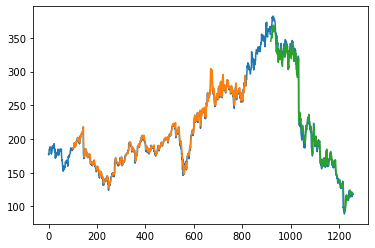

In [74]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [75]:
len(test_data)




440

In [76]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [77]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [78]:
temp_input

[0.27844648276332395,
 0.2666484809220173,
 0.2773553380843592,
 0.27149043543492346,
 0.3049408394994374,
 0.30204248644593723,
 0.3123060660824497,
 0.3136358986599379,
 0.30879394414703176,
 0.2930405428444778,
 0.29239267569134253,
 0.2695468339755175,
 0.2528045828076517,
 0.24618951819142776,
 0.25352064650322226,
 0.2723428922153647,
 0.24847410236301026,
 0.23957445357520368,
 0.23272070106045628,
 0.2523954035530399,
 0.2606812834589287,
 0.24349575476523344,
 0.23742626248849186,
 0.243734442663757,
 0.24942885395710446,
 0.2736045282504178,
 0.27295666109728245,
 0.21897909775974356,
 0.2133187847376138,
 0.20677191666382522,
 0.19565588024687147,
 0.20155488116752485,
 0.19497391482251852,
 0.18143690114911182,
 0.1838237801343472,
 0.17560609677089373,
 0.16183039519896347,
 0.15511303576908658,
 0.1796978893170117,
 0.16196678828383404,
 0.15947761448494568,
 0.16946840795171692,
 0.17516281924506433,
 0.17073004398676989,
 0.17103692842772872,
 0.15187370000340983,
 0.15

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10600546]
101
1 day input [0.26664848 0.27735534 0.27149044 0.30494084 0.30204249 0.31230607
 0.3136359  0.30879394 0.29304054 0.29239268 0.26954683 0.25280458
 0.24618952 0.25352065 0.27234289 0.2484741  0.23957445 0.2327207
 0.2523954  0.26068128 0.24349575 0.23742626 0.24373444 0.24942885
 0.27360453 0.27295666 0.2189791  0.21331878 0.20677192 0.19565588
 0.20155488 0.19497391 0.1814369  0.18382378 0.1756061  0.1618304
 0.15511304 0.17969789 0.16196679 0.15947761 0.16946841 0.17516282
 0.17073004 0.17103693 0.1518737  0.15303304 0.13513145 0.13158523
 0.14109865 0.12906196 0.1538855  0.14965731 0.15112354 0.14532683
 0.14014389 0.13915504 0.1657176  0.13949603 0.03079074 0.03508712
 0.01449177 0.02144781 0.00555802 0.         0.00641047 0.02663075
 0.02577829 0.04282743 0.07828963 0.08221093 0.08630272 0.09605483
 0.082927   0.0768575  0.0789034  0.07143588 0.07682341 0.07955127
 0.07672111 0.06775326 0.07007195 0.09953285 0.10751185 0.11791182
 0.11429741 0.08596174 0.08531387 0

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [81]:
import matplotlib.pyplot as plt


In [82]:
len(df1)


1257

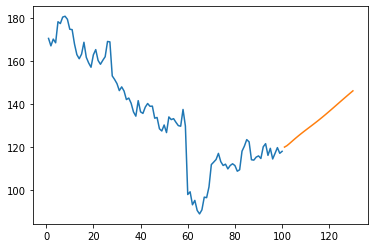

In [84]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

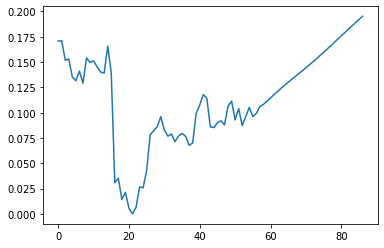

In [91]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [86]:
df3=scaler.inverse_transform(df3).tolist()


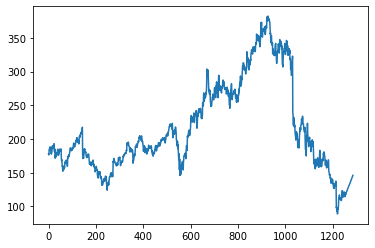

In [87]:
plt.plot(df3)